**Машинско учење во дигитална форензика**

Алгоритми кои што ги употребивме:

*K Nearest Neighborhood*

*Decision Tree Classifier*

*Random Forest Classifier*

*Naive Bayes*

**Читање на податочното множество и импортирање на потребните библиотеки**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler,  OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D, MaxPooling1D , GlobalMaxPool1D , GlobalMaxPooling1D , GlobalAveragePooling1D , MaxPooling1D
from keras import backend as K
from keras.utils.np_utils import to_categorical 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import math

In [ ]:
crime = pd.read_csv('/content/drive/MyDrive/crime.csv' , encoding='latin-1')
code = pd.read_csv('/content/drive/MyDrive/offense_codes.csv' , encoding='latin-1')
data = pd.read_csv('/content/drive/MyDrive/crime.csv' , encoding='latin-1')
crime.info()
code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [ ]:
crime.head()

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  \
0      D14            808      NaN  2018-09-02 13:00:00  2018      9   
1      C11            347      NaN  2018-08-21 00:00:00  2018      8   
2       D4            151      NaN  2018-09-03 19:27:00  2018      9   
3       D4            272      NaN  2018-09-03 21:16:00  2018      9   
4       B3            421      NaN  2018-09-03 21:05:00  2018      9   

  DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long  \
0      Sunday    13    Part One   LINCOLN ST  42.357791 -71.139371   
1     Tuesday     0    Part Two     HECLA ST  42.306821 -71.060300   
2      Monday    19  Part Three  CAZENOVE ST  42.346589 -71.072429   
3      Monday    21  Part Three   NEWCOMB ST  42.334182 -71.078664   
4      Monday    21  Part Three     DELHI ST  42.275365 -71.090361   

                      Location  
0  (42.35779134, -71.13937053)  
1  (42.30682138, -71.06030035)  
2  (42.34658879, -71.07242943)  
3  (42.33418175, -71.07866441)  
4  (42.27536542, -71.09036101)

In [ ]:
code.head()

CODE                                     NAME
0   612         LARCENY PURSE SNATCH - NO FORCE 
1   613                      LARCENY SHOPLIFTING
2   615  LARCENY THEFT OF MV PARTS & ACCESSORIES
3  1731                                   INCEST
4  3111                LICENSE PREMISE VIOLATION

**Предпроцесирање на податоците**

In [ ]:
crime = crime.drop(['INCIDENT_NUMBER' ,  'REPORTING_AREA' , 'OFFENSE_DESCRIPTION' , 'OCCURRED_ON_DATE' , 'UCR_PART' ,'Location'] , axis=1)
crime.head()

OFFENSE_CODE    OFFENSE_CODE_GROUP DISTRICT SHOOTING  YEAR  MONTH  \
0           619               Larceny      D14      NaN  2018      9   
1          1402             Vandalism      C11      NaN  2018      8   
2          3410                 Towed       D4      NaN  2018      9   
3          3114  Investigate Property       D4      NaN  2018      9   
4          3114  Investigate Property       B3      NaN  2018      9   

  DAY_OF_WEEK  HOUR       STREET        Lat       Long  
0      Sunday    13   LINCOLN ST  42.357791 -71.139371  
1     Tuesday     0     HECLA ST  42.306821 -71.060300  
2      Monday    19  CAZENOVE ST  42.346589 -71.072429  
3      Monday    21   NEWCOMB ST  42.334182 -71.078664  
4      Monday    21     DELHI ST  42.275365 -71.090361

In [ ]:
crime.isnull().sum()

OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
DISTRICT                   0
SHOOTING              318054
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
STREET                     0
Lat                    19999
Long                   19999
dtype: int64

In [ ]:
code.isnull().sum()

CODE    0
NAME    0
dtype: int64

In [ ]:
crime.SHOOTING = [1 if each == 'Y' else 0 for each in crime.SHOOTING]

In [ ]:
crime = crime.dropna(how="any")
crime.isnull().sum()

OFFENSE_CODE          0
OFFENSE_CODE_GROUP    0
DISTRICT              0
SHOOTING              0
YEAR                  0
MONTH                 0
DAY_OF_WEEK           0
HOUR                  0
STREET                0
Lat                   0
Long                  0
dtype: int64

In [ ]:
crime.head(19)

OFFENSE_CODE  OFFENSE_CODE_GROUP  DISTRICT  SHOOTING  YEAR  MONTH  \
0            619                  34         7         0  2018      9   
1           1402                  63         5         0  2018      8   
2           3410                  62         8         0  2018      9   
3           3114                  32         8         0  2018      9   
4           3114                  32         4         0  2018      9   
5           3820                  43         5         0  2018      9   
6            724                   4         3         0  2018      9   
7           3301                  64         3         0  2018      9   
8            301                  58         6         0  2018      9   
9           3301                  64         5         0  2018      9   
10          3301                  64         6         0  2018      9   
11          3114                  32         6         0  2018      9   
12          3108                  19         8         0  2018      9   
13          2647                  46         4         0  2018      9   
14          3201                  52         4         0  2018      9   
15          3006                  40        12         0  2018      9   
16          3301                  64         5         0  2018      9   
17          3305                   3         8         0  2018      9   
18          2647                  46         3         0  2018      9   

    DAY_OF_WEEK  HOUR  STREET        Lat       Long  
0             3    13    2535  42.357791 -71.139371  
1             5     0    2073  42.306821 -71.060300  
2             1    19     784  42.346589 -71.072429  
3             1    21    3065  42.334182 -71.078664  
4             1    21    1240  42.275365 -71.090361  
5             1    21    4073  42.290196 -71.071590  
6             1    21    3098  42.306072 -71.082733  
7             1    20    2459  42.327016 -71.105551  
8             1    20    2740  42.331521 -71.070853  
9             1    20    2503  42.295147 -71.058608  
10            1    19    3158  42.319579 -71.040328  
11            1    20    1173  42.340115 -71.053390  
12            1    19    2708  42.350388 -71.087853  
13            1    20    4611  42.286470 -71.087147  
14            3    14    2967  42.279241 -71.096674  
15            1    19    4657  42.352875 -71.073830  
16            1    18    3999  42.305264 -71.066838  
17            1    17    2218  42.348577 -71.077720  
18            1    19    2175  42.333717 -71.096658

In [ ]:
le = LabelEncoder()
crime['DAY_OF_WEEK'] = le.fit_transform(crime['DAY_OF_WEEK'] ) 
crime['STREET'] = le.fit_transform(crime['STREET'])
crime['OFFENSE_CODE_GROUP'] = le.fit_transform(crime['OFFENSE_CODE_GROUP'])
crime['DISTRICT'] = le.fit_transform(crime['DISTRICT'])
crime.head()

OFFENSE_CODE  OFFENSE_CODE_GROUP  DISTRICT  SHOOTING  YEAR  MONTH  \
0           619                  34         7         0  2018      9   
1          1402                  63         5         0  2018      8   
2          3410                  62         8         0  2018      9   
3          3114                  32         8         0  2018      9   
4          3114                  32         4         0  2018      9   

   DAY_OF_WEEK  HOUR  STREET        Lat       Long  
0            3    13    2261  42.357791 -71.139371  
1            5     0    1844  42.306821 -71.060300  
2            1    19     675  42.346589 -71.072429  
3            1    21    2716  42.334182 -71.078664  
4            1    21    1081  42.275365 -71.090361

In [ ]:
def off_code_size(df):
    codes = pd.unique(df.OFFENSE_CODE)
    size = []
    for i in codes:
        size.append(len(df[df['OFFENSE_CODE'] == i]))
    return size

def code_name(df):
    codes = code.values
    names = []
    off_codes = pd.unique(df.OFFENSE_CODE)
    iterr = 0
    for i in off_codes:
        if(i in codes):
            iterr += 1
            names.append(codes[iterr][1])
    return names

**Визуализација на податоците**

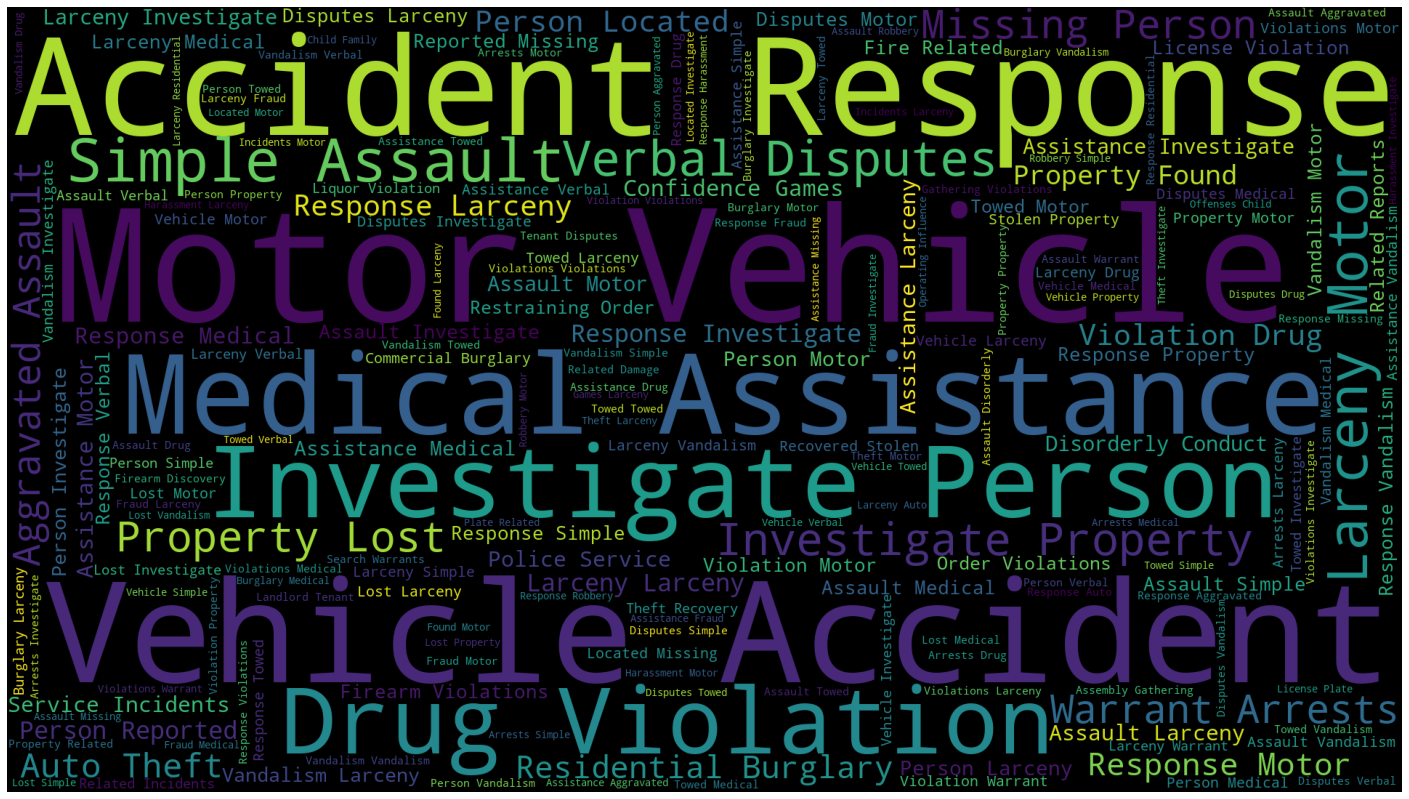

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.OFFENSE_CODE_GROUP))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

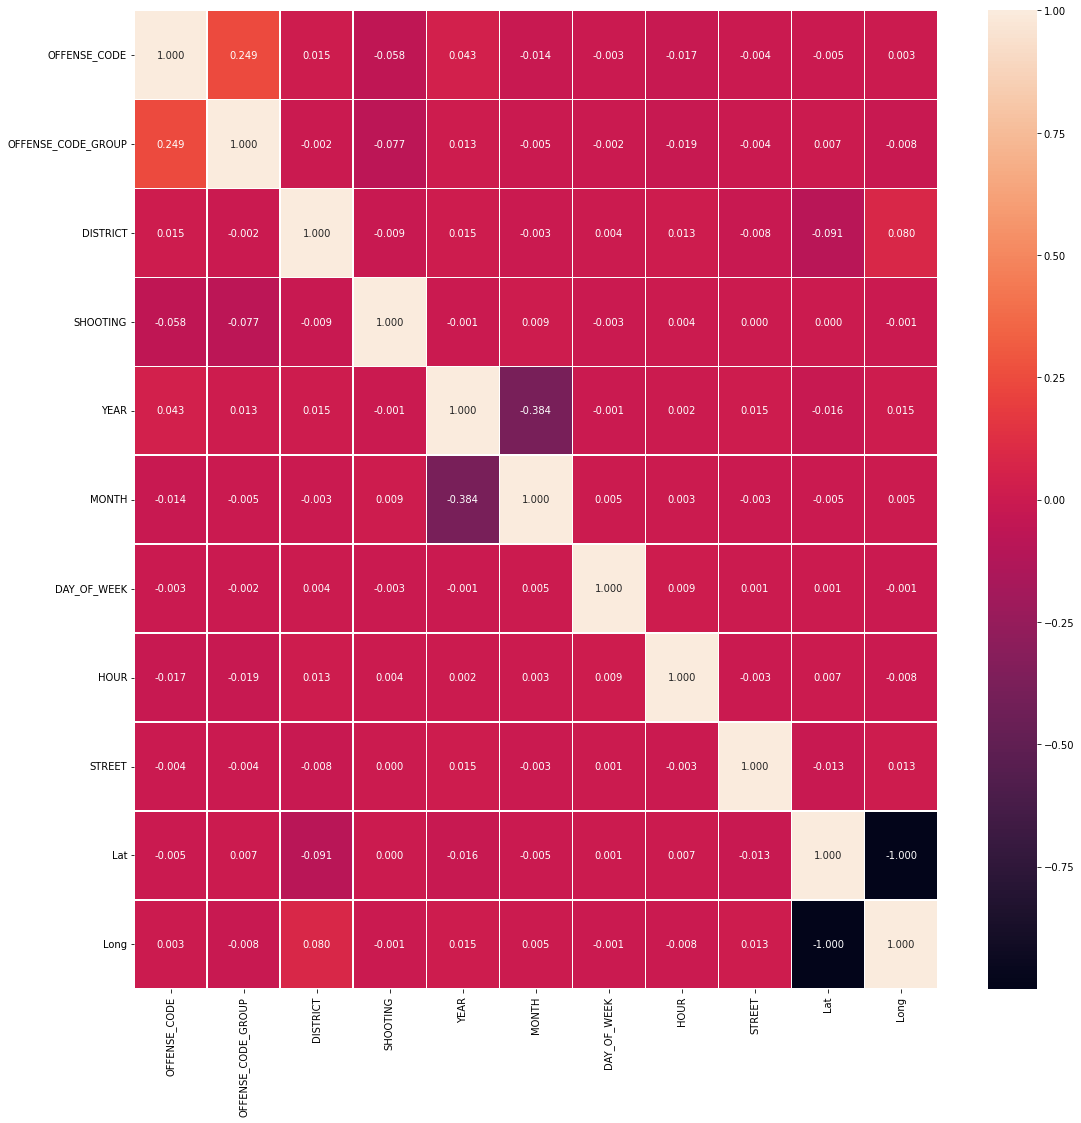

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(crime.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)
plt.savefig("corr.png")
plt.show()

In [ ]:
crime_2015 = crime[crime.YEAR == 2015] 
crime_2016 = crime[crime.YEAR == 2016]
crime_2017 = crime[crime.YEAR == 2017]
crime_2018 = crime[crime.YEAR == 2018]

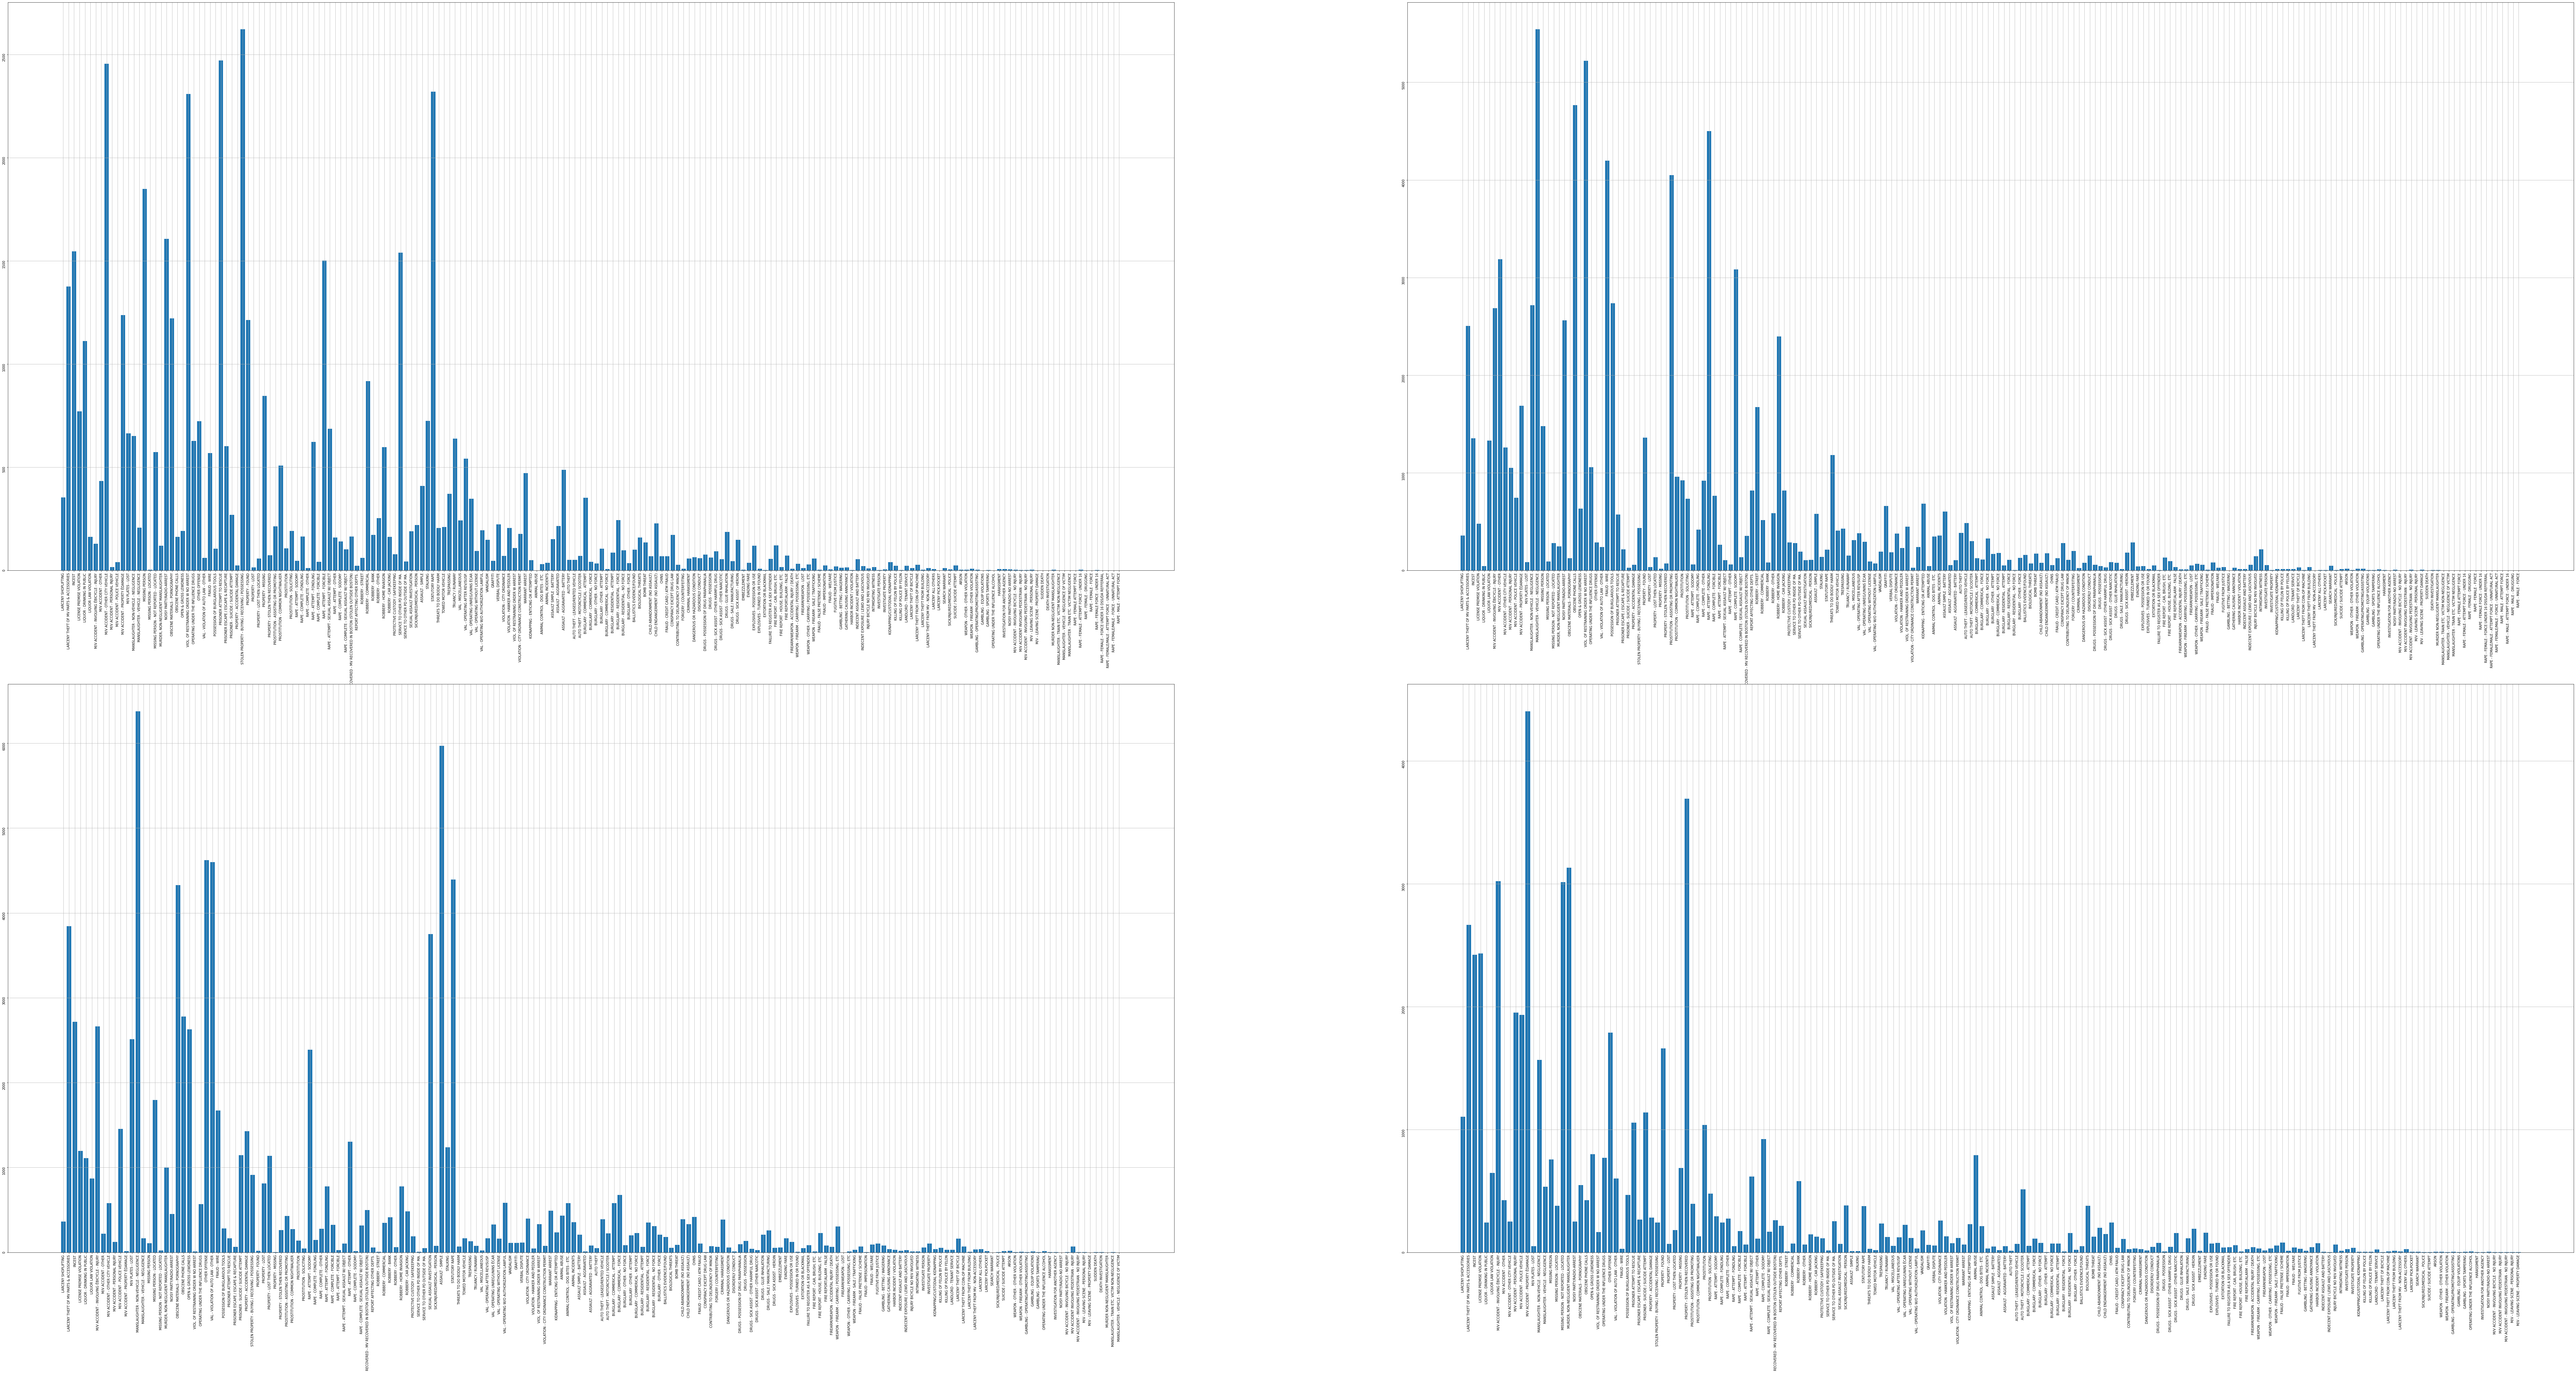

In [ ]:
fig, ax1 = plt.subplots(2, 2, figsize= (140, 70) )

ax1[0,0].bar(code_name(crime_2015) , off_code_size(crime_2015))
ax1[0,0].tick_params(labelrotation=90)
ax1[0,1].bar(code_name(crime_2016) , off_code_size(crime_2016))  
ax1[0,1].tick_params(labelrotation=90)
ax1[1,0].bar(code_name(crime_2017) , off_code_size(crime_2017)) 
ax1[1,0].tick_params(labelrotation=90)
ax1[1,1].bar(code_name(crime_2018) , off_code_size(crime_2018)) 
ax1[1,1].tick_params(labelrotation=90)

ax1[0,0].grid()
ax1[0,1].grid()
ax1[1,0].grid()
ax1[1,1].grid()

plt.show()

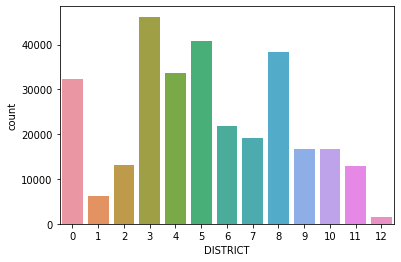

In [ ]:
sns.countplot(data=crime, x='DISTRICT')

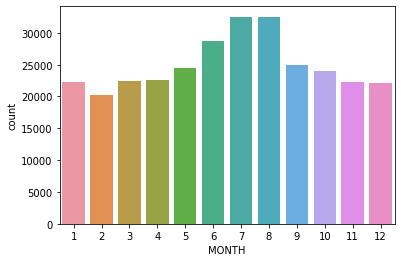

In [ ]:
sns.countplot(data=crime, x='MONTH')

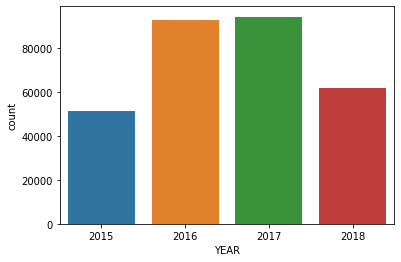

In [ ]:
sns.countplot(data=crime, x='YEAR')

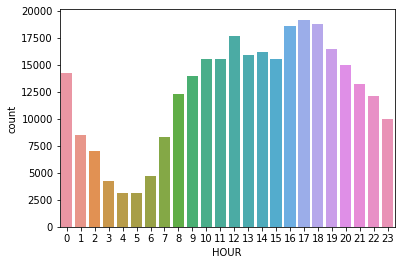

In [ ]:
sns.countplot(data=crime, x='HOUR')

**Класификација**

In [ ]:
labels_dis = le.inverse_transform(crime['DISTRICT'])
ld = sorted(pd.unique(labels_dis))
print(ld)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [ ]:
X = crime.drop(['DISTRICT'] , axis=1)
Y = crime.DISTRICT

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.33, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

**KNN класификација:**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=77 , metric='minkowski')
knn.fit(X_train , y_train)
y_pred_knn = knn.predict(X_test)

cm_knn = confusion_matrix(y_test , y_pred_knn)
print('KNN')
print(cm_knn)

KNN
[[2615    0   24 2952 1113 1739  129   94 1905   30   70   28    6]
 [ 302    0   10  659  293  335   23   29  304    6   12    3    6]
 [ 540    0   30 1401  629  836   93   43  685    8   28    9    2]
 [1729    1   30 6206 1726 3041  212   98 2014   54   93   32    4]
 [1122    1   31 3987 1982 2223  156   71 1316   26   71   13    2]
 [1459    3   30 4847 1645 3552  193  111 1549   41   64   22    4]
 [ 863    0   20 2409  762 1485  320   78 1098   26   45   13   23]
 [ 763    1    9 2103  713 1323   73  115 1060   16   25   15    0]
 [1617    2   26 3686 1260 2034  174   89 3754   42   67   22    3]
 [ 774    0   11 1878  680 1037   61   56  887   38   31   12    1]
 [ 587    0   12 1991  773 1103   70   30  812   12  116   11    0]
 [ 650    2    7 1489  567  891   50   47  528   21   22   42   11]
 [  67    0    0  139   50   30    0    3   11    5    0    4  190]]


In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(cm_knn, xticklabels=ld, yticklabels=ld, linewidths=.5 , cbar=False , fmt="d" , annot=True)
plt.savefig("knn.png")
plt.show()

NameError: ignored

In [ ]:
label_error = 1 - np.diag(cm_knn) / np.sum(cm_knn, axis=1)
plt.figure(figsize=(15,5))
plt.bar(ld,label_error)
plt.xlabel('True Label')
plt.ylabel('Classified incorrectly')
plt.savefig("knn_bar.png")
plt.show

<function matplotlib.pyplot.show>

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.20      0.24      0.22     10705
           1       0.00      0.00      0.00      1982
           2       0.12      0.01      0.01      4304
           3       0.18      0.41      0.25     15240
           4       0.16      0.18      0.17     11001
           5       0.18      0.26      0.21     13520
           6       0.21      0.04      0.07      7142
           7       0.13      0.02      0.03      6216
           8       0.24      0.29      0.26     12776
           9       0.12      0.01      0.01      5466
          10       0.18      0.02      0.04      5517
          11       0.19      0.01      0.02      4327
          12       0.75      0.38      0.51       499

    accuracy                           0.19     98695
   macro avg       0.20      0.14      0.14     98695
weighted avg       0.18      0.19      0.16     98695



**Decision Tree Classifier:**

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train , y_train)
y_pred_dtc = dtc.predict(X_test)

cm_dtc = confusion_matrix(y_test,y_pred_dtc)
print('DTC')
print(cm_dtc)

DTC
[[10130     2     0    16     1    17   394     8    98     8     0     0
     31]
 [   91  1835     3    50     0     1     0     0     0     0     0     0
      2]
 [   27     1  4251     4     0     3     1     2     0     0     0     0
     15]
 [   20    19     9 12813   308  1575   126     7    82   116    38    13
    114]
 [   48    12     0   116  9511  1085    21     2    30     8   160     3
      5]
 [   57     0     0    73    11 13128   132     1    64    32     6     0
     16]
 [   16     1     0    55     1   223  6821     0    11     0     0    10
      4]
 [    4     0     2    77     1    12     0  6061    32    26     0     0
      1]
 [  314     2     8   167    20    53  1131     7 10961    11     1    33
     68]
 [   25     0     0   671     7     8     0    61    85  4517    40    50
      2]
 [   17     0     0     4   177     3     3    14     8    30  5243     4
     14]
 [    2     0     0    64     1     0    51     1    18   195   335  3660
      0]


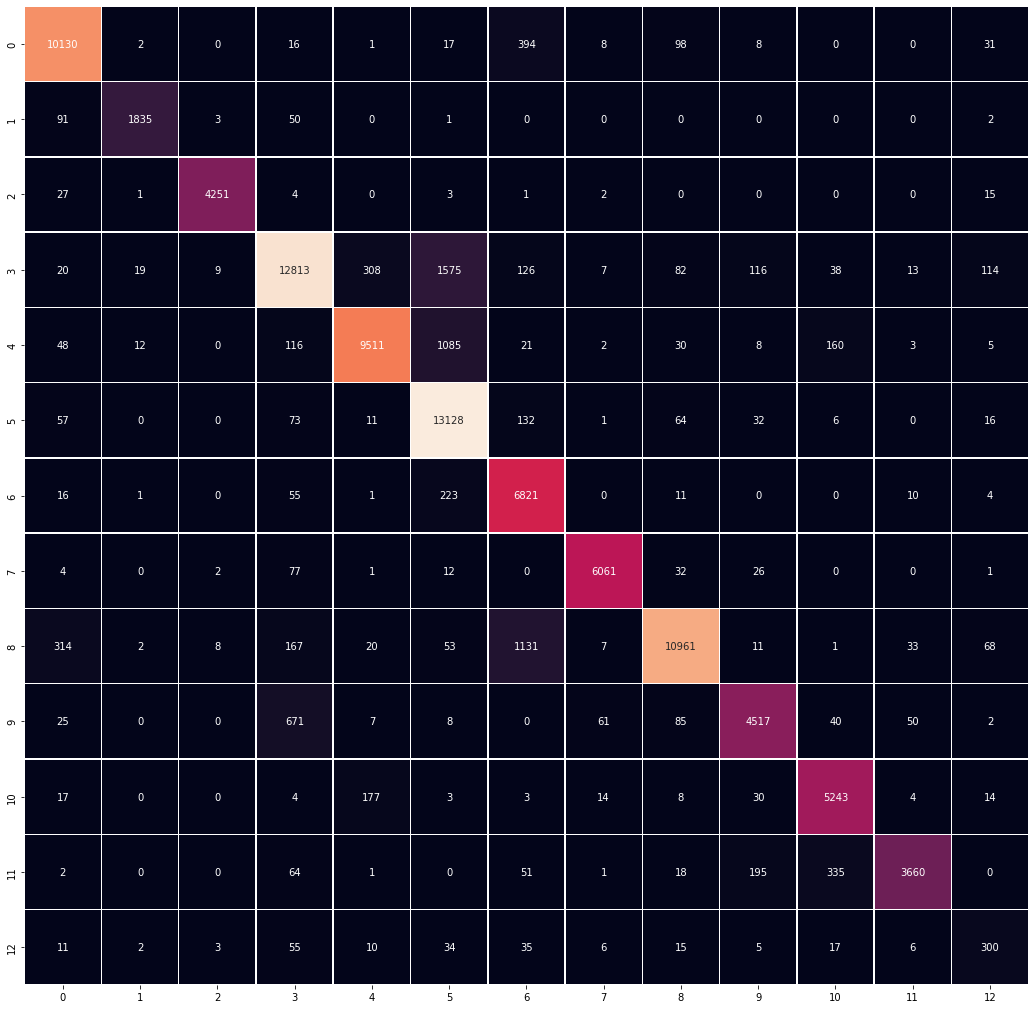

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(cm_dtc, xticklabels=ld, yticklabels=ld, linewidths=.5 , cbar=False , fmt="d" , annot=True)
plt.savefig("dtc.png")
plt.show()



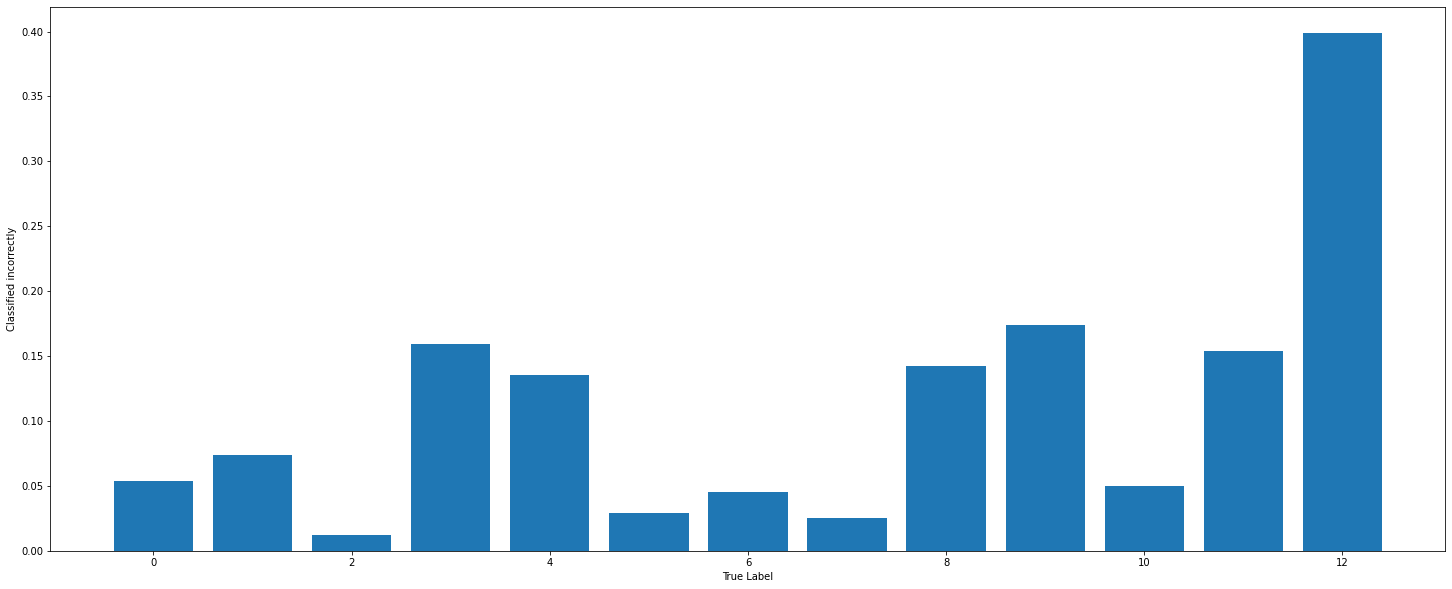

In [ ]:
label_error = 1 - np.diag(cm_dtc) / np.sum(cm_dtc, axis=1)
plt.figure(figsize=(15,5))
plt.bar(ld,label_error)
plt.xlabel('True Label')
plt.ylabel('Classified incorrectly')
plt.savefig("dtc_bar.png")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10705
           1       0.98      0.93      0.95      1982
           2       0.99      0.99      0.99      4304
           3       0.90      0.84      0.87     15240
           4       0.95      0.86      0.90     11001
           5       0.81      0.97      0.89     13520
           6       0.78      0.96      0.86      7142
           7       0.98      0.98      0.98      6216
           8       0.96      0.86      0.91     12776
           9       0.91      0.83      0.87      5466
          10       0.90      0.95      0.92      5517
          11       0.97      0.85      0.90      4327
          12       0.52      0.60      0.56       499

    accuracy                           0.90     98695
   macro avg       0.89      0.89      0.89     98695
weighted avg       0.91      0.90      0.90     98695



**Random Forest Classifier:**

In [ ]:
rfc = RandomForestClassifier(criterion='entropy' , n_estimators=33)
rfc.fit(X_train , y_train)
y_pred_rfc = rfc.predict(X_test)

cm_rfc = confusion_matrix(y_test,y_pred_rfc)
print('RFC')
print(cm_rfc)

RFC
[[10129     2     2    13     1    17   374     8   146     7     0     0
      6]
 [   84  1844     1    48     0     2     0     0     0     0     0     0
      3]
 [   27     1  4266     3     0     0     1     2     3     0     0     0
      1]
 [    2     0     9 13123   281  1453   115    12    50   149    35     9
      2]
 [   59    12     0    57  9623  1060     0     0    33     4   148     3
      2]
 [   35     1     0    68    22 13293    21     0    63     9     6     0
      2]
 [  136     1     0     9     0   252  6715     0     7     0     0     2
     20]
 [    1     0     0    64     1    10     0  6098    34     8     0     0
      0]
 [  364     2     0   187     3     6   799     5 11360     5     1    33
     11]
 [   25     0     0   646    13     7     0    61    10  4656    33    14
      1]
 [   13     0     0     4   132     3     0    33    11     8  5310     3
      0]
 [    2     0     0    71     1     1    51     0     9   169   308  3711
      4]


In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(cm_rfc, xticklabels=ld, yticklabels=ld, linewidths=.5 , cbar=False , fmt="d" , annot=True)
plt.savefig("rfc.png")
plt.show()

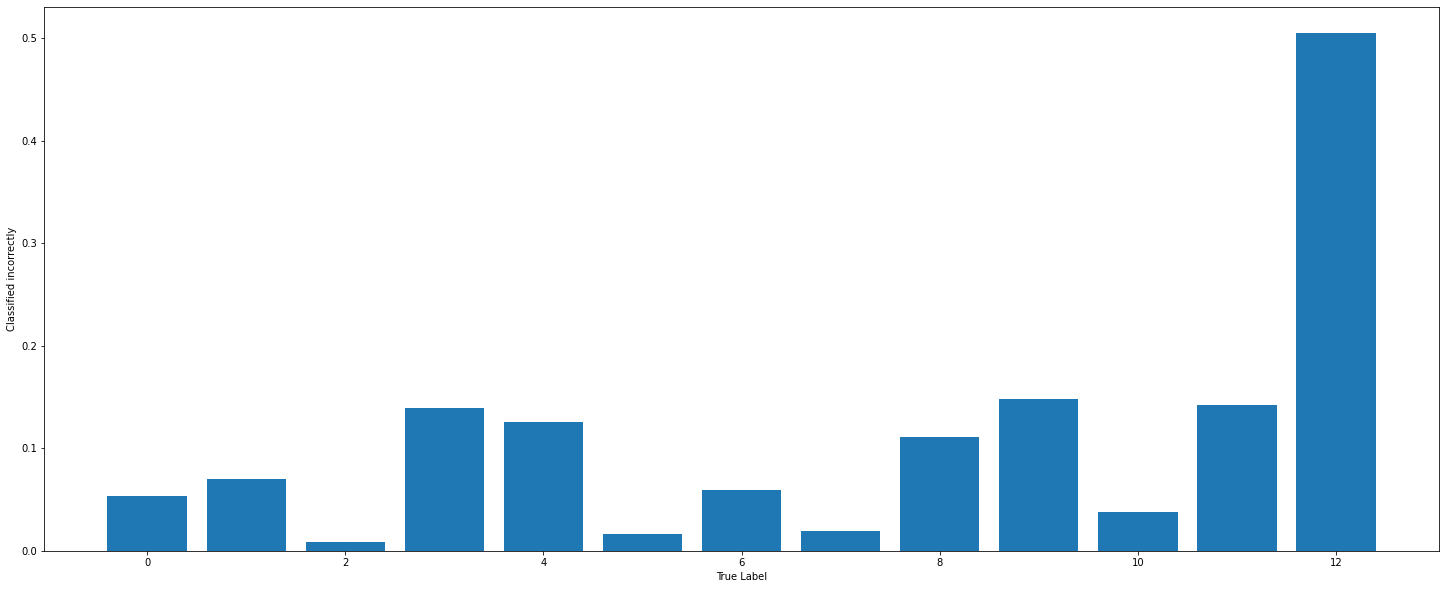

In [ ]:
label_error = 1 - np.diag(cm_rfc) / np.sum(cm_rfc, axis=1)
plt.figure(figsize=(15,5))
plt.bar(ld,label_error)
plt.xlabel('True Label')
plt.ylabel('Classified incorrectly')
plt.savefig("rfc_bar.png")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10705
           1       0.99      0.93      0.96      1982
           2       1.00      0.99      0.99      4304
           3       0.91      0.86      0.89     15240
           4       0.95      0.87      0.91     11001
           5       0.82      0.98      0.90     13520
           6       0.83      0.94      0.88      7142
           7       0.98      0.98      0.98      6216
           8       0.97      0.89      0.93     12776
           9       0.93      0.85      0.89      5466
          10       0.91      0.96      0.93      5517
          11       0.98      0.86      0.91      4327
          12       0.83      0.49      0.62       499

    accuracy                           0.92     98695
   macro avg       0.92      0.89      0.90     98695
weighted avg       0.92      0.92      0.92     98695



**Gaussian Naive Bayes:**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train , y_train)
y_pred_gnb = gnb.predict(X_test)

cm_gnb = confusion_matrix(y_test,y_pred_gnb)
print('GNB')
print(cm_gnb)

GNB
[[    0     6     0     4  2289     0     0     0  8401     0     5     0
      0]
 [    0     6     0     0   489     0     0     0  1487     0     0     0
      0]
 [    0     1     0     4   956     0     0     0  3343     0     0     0
      0]
 [    0     2     0   116  4427     0     0     0 10584     0   111     0
      0]
 [    0     2     0    63  2052     0     0     0  3991     0  4893     0
      0]
 [    0     4     0    52  4067     0     0     0  9391     0     6     0
      0]
 [    0    23     0     6  1839     0     0     0  5272     0     2     0
      0]
 [    0     0     0     8  1543     0     0     0  4665     0     0     0
      0]
 [    0     0     0     8  2646     0     0     0 10085     0    37     0
      0]
 [    0     1     0    22   913     0     0     0  2443     0  2087     0
      0]
 [    0     0     0    12    13     0     0     0    57     0  5435     0
      0]
 [    0     9     0     1   382     0     0     0   779     0  3156     0
      0]


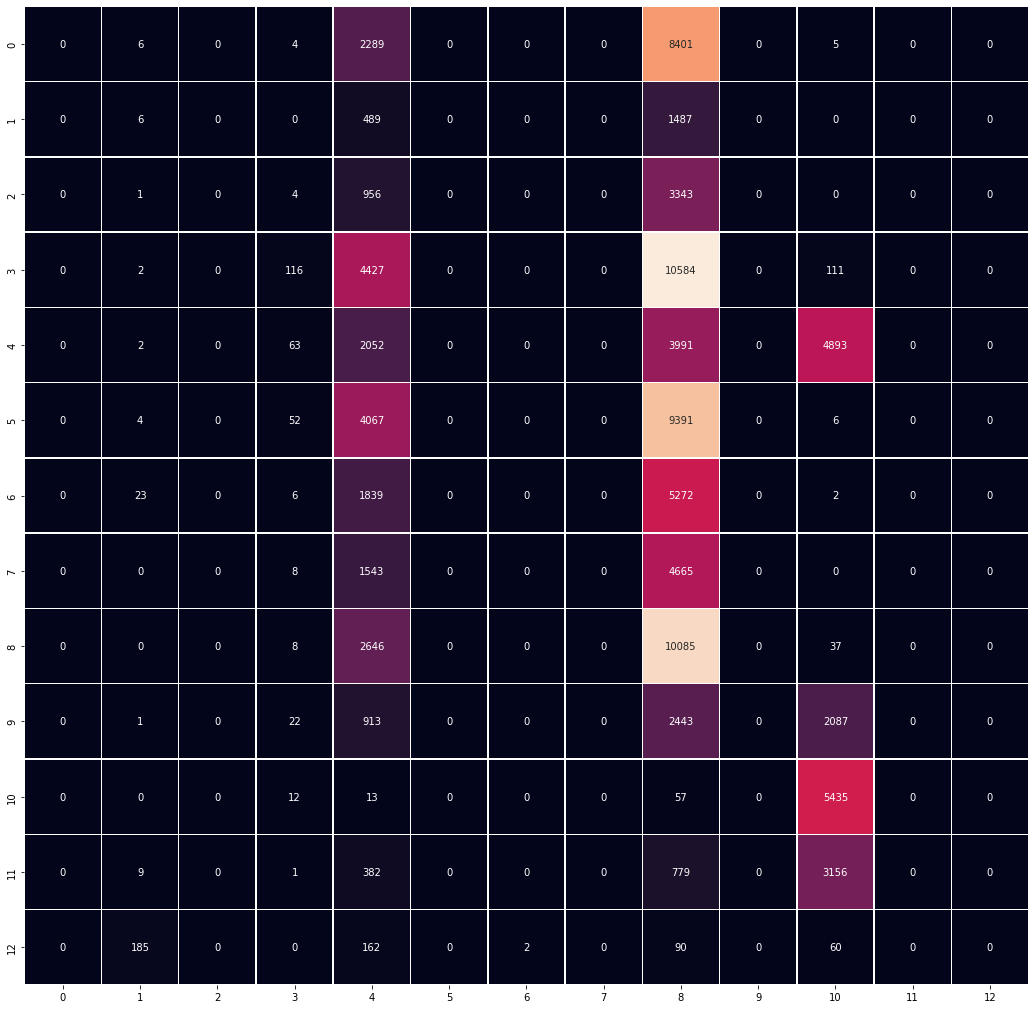

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(cm_gnb, xticklabels=ld, yticklabels=ld, linewidths=.5 , cbar=False , fmt="d" , annot=True)
plt.savefig("gbn.png")
plt.show()

In [ ]:
label_error = 1 - np.diag(cm_gnb) / np.sum(cm_gnb, axis=1)
plt.figure(figsize=(15,5))
plt.bar(ld,label_error)
plt.xlabel('True Label')
plt.ylabel('Classified incorrectly')
plt.savefig("gbn_bar.png")
plt.show()

NameError: ignored

In [ ]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10705
           1       0.03      0.00      0.01      1982
           2       0.00      0.00      0.00      4304
           3       0.39      0.01      0.01     15240
           4       0.09      0.19      0.13     11001
           5       0.00      0.00      0.00     13520
           6       0.00      0.00      0.00      7142
           7       0.00      0.00      0.00      6216
           8       0.17      0.79      0.27     12776
           9       0.00      0.00      0.00      5466
          10       0.34      0.99      0.51      5517
          11       0.00      0.00      0.00      4327
          12       0.00      0.00      0.00       499

    accuracy                           0.18     98695
   macro avg       0.08      0.15      0.07     98695
weighted avg       0.11      0.18      0.08     98695



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**По споредбата на алгоритмите, добивме висока точност со алгоритмите Decision tree и Random forest, а пониска со останатите алгоритми за класификација.**